In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
df_original = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [4]:
df = df_original.copy()

In [5]:
df.shape

(41188, 21)

In [6]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [62]:
cat_cols = [col for col in df.columns 
            if df[col].dtype == 'object' or df[col].nunique() < 10]

num_cols = [col for col in df.columns 
            if df[col].dtype in ['int64', 'float64'] and df[col].nunique() >= 10]

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'y']
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39245 non-null  int64  
 1   job             39245 non-null  object 
 2   marital         39245 non-null  object 
 3   education       39245 non-null  object 
 4   default         39245 non-null  object 
 5   housing         39245 non-null  object 
 6   loan            39245 non-null  object 
 7   contact         39245 non-null  object 
 8   month           39245 non-null  object 
 9   day_of_week     39245 non-null  object 
 10  duration        39245 non-null  int64  
 11  campaign        39245 non-null  int64  
 12  pdays           39245 non-null  int64  
 13  previous        39245 non-null  int64  
 14  poutcome        39245 non-null  object 
 15  emp.var.rate    39245 non-null  float64
 16  cons.price.idx  39245 non-null  float64
 17  cons.conf.idx   39245 non-null  floa

In [64]:
for col in df.columns:
    print(f"{col} — {df[col].nunique()} unique values")

age — 77 unique values
job — 11 unique values
marital — 3 unique values
education — 7 unique values
default — 2 unique values
housing — 2 unique values
loan — 2 unique values
contact — 2 unique values
month — 10 unique values
day_of_week — 5 unique values
duration — 1525 unique values
campaign — 42 unique values
pdays — 26 unique values
previous — 8 unique values
poutcome — 3 unique values
emp.var.rate — 10 unique values
cons.price.idx — 26 unique values
cons.conf.idx — 26 unique values
euribor3m — 314 unique values
nr.employed — 11 unique values
y — 2 unique values


In [65]:
df['y'].value_counts()

y
no     34877
yes     4368
Name: count, dtype: int64

In [66]:
df['y'].value_counts(normalize=True)

y
no     0.888699
yes    0.111301
Name: proportion, dtype: float64

In [67]:
df.replace('unknown', np.nan, inplace=True)
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [68]:
df.dropna(subset=['job', 'education', 'contact'], inplace=True)

In [69]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [70]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.duplicated().sum()

0

In [74]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39245.000000,39245.000000,39245.000000,39245.000000,39245.000000,39245.000000,39245.000000,39245.000000,39245.000000,39245.000000
mean,39.857434,258.133138,2.567410,963.474251,0.170748,0.082306,93.571435,-40.538188,3.622633,5167.369316
std,10.288628,259.830527,2.774475,184.437735,0.488550,1.566734,0.577178,4.622804,1.730777,71.790697
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [75]:
df.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,39245,39245,39245,39245,39245,39245,39245,39245,39245,39245,39245
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10169,23807,12118,39242,21546,33278,25020,13153,8209,33913,34877


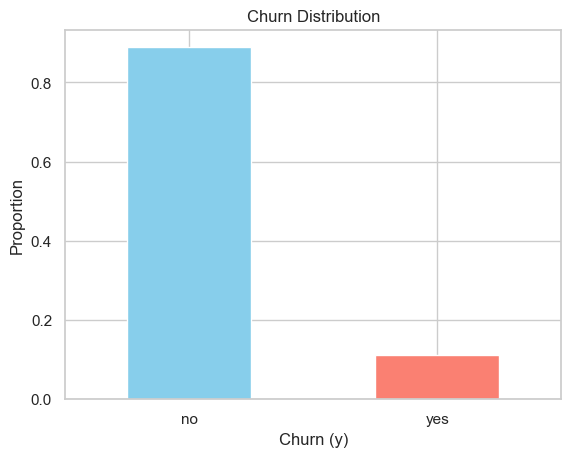

In [76]:
df['y'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Churn Distribution")
plt.xlabel("Churn (y)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

In [77]:
print(df.groupby('job')['y'].value_counts().unstack())

y                no   yes
job                      
admin.         8856  1313
blue-collar    8184   614
entrepreneur   1279   120
housemaid       917   101
management     2493   308
retired        1220   401
self-employed  1245   147
services       3513   304
student         492   216
technician     5822   705
unemployed      856   139


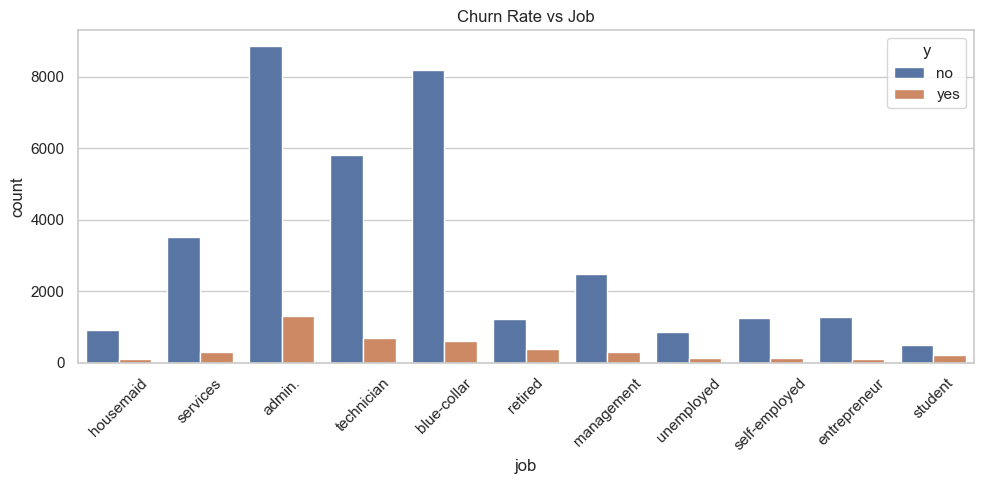

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(x='job', hue='y', data=df)
plt.title("Churn Rate vs Job")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
print(df.groupby('marital')['y'].value_counts().unstack())

y            no   yes
marital              
divorced   3960   456
married   21399  2408
single     9518  1504


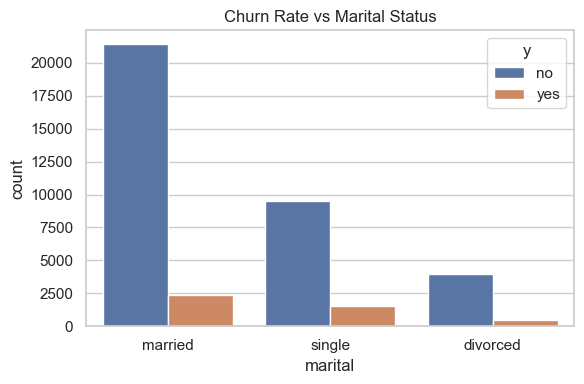

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='y', data=df)
plt.title("Churn Rate vs Marital Status")
plt.tight_layout()
plt.show()

In [81]:
print(df.groupby('education')['y'].value_counts().unstack())

y                       no   yes
education                       
basic.4y              3699   424
basic.6y              2082   187
basic.9y              5542   472
high.school           8446  1029
illiterate              14     4
professional.course   4634   594
university.degree    10460  1658


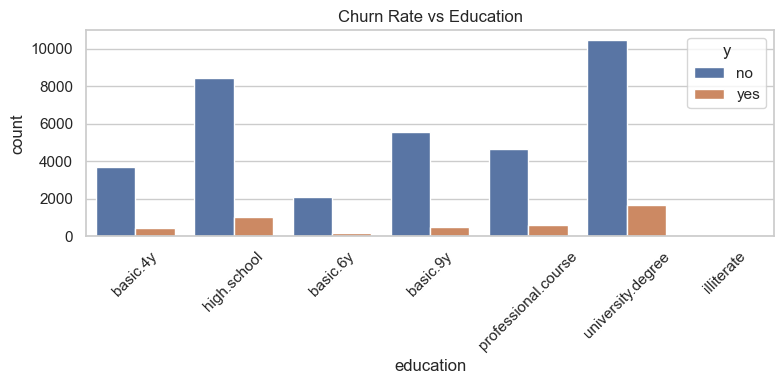

In [82]:
plt.figure(figsize=(8, 4))
sns.countplot(x='education', hue='y', data=df)
plt.title("Churn Rate vs Education")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
print(df.groupby('default')['y'].value_counts().unstack())

y             no     yes
default                 
no       34874.0  4368.0
yes          3.0     NaN


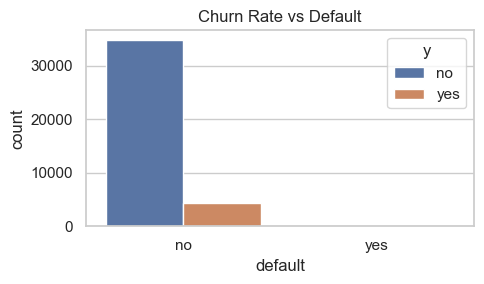

In [84]:
plt.figure(figsize=(5, 3))
sns.countplot(x='default', hue='y', data=df)
plt.title("Churn Rate vs Default")
plt.tight_layout()
plt.show()

In [85]:
print(df.groupby('housing')['y'].value_counts().unstack())

y           no   yes
housing             
no       15787  1912
yes      19090  2456


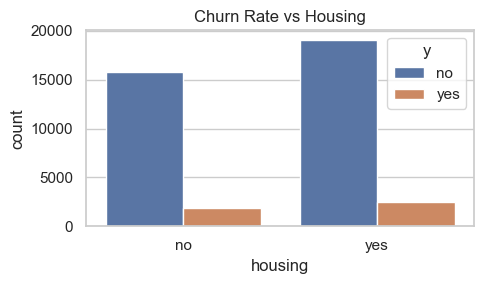

In [86]:
plt.figure(figsize=(5, 3))
sns.countplot(x='housing', hue='y', data=df)
plt.title("Churn Rate vs Housing")
plt.tight_layout()
plt.show()

In [87]:
print(df.groupby('loan')['y'].value_counts().unstack())

y        no   yes
loan             
no    29549  3729
yes    5328   639


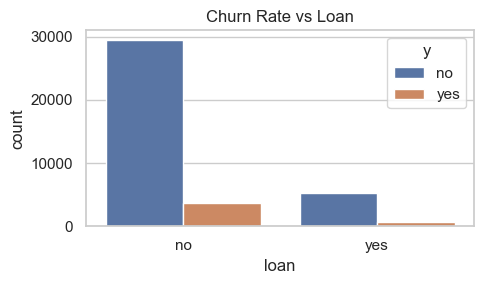

In [88]:
plt.figure(figsize=(5, 3))
sns.countplot(x='loan', hue='y', data=df)
plt.title("Churn Rate vs Loan")
plt.tight_layout()
plt.show()

In [89]:
print(df.groupby('contact')['y'].value_counts().unstack())

y             no   yes
contact               
cellular   21389  3631
telephone  13488   737


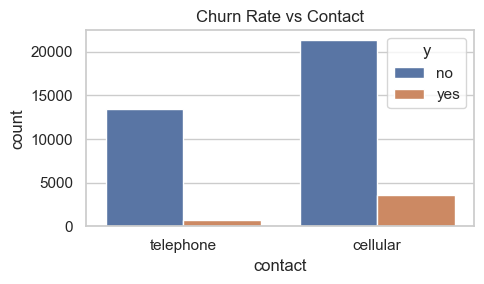

In [90]:
plt.figure(figsize=(5, 3))
sns.countplot(x='contact', hue='y', data=df)
plt.title("Churn Rate vs Contact")
plt.tight_layout()
plt.show()

In [91]:
print(df.groupby('month')['y'].value_counts().unstack())

y         no  yes
month            
apr     1995  500
aug     5336  618
dec       87   80
jul     6159  608
jun     4500  523
mar      252  259
may    12304  849
nov     3588  391
oct      373  307
sep      283  233


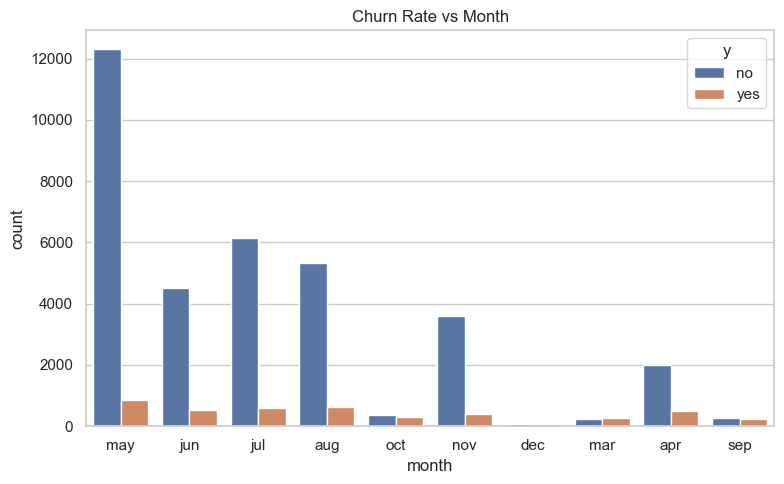

In [92]:
plt.figure(figsize=(8, 5))
sns.countplot(x='month', hue='y', data=df)
plt.title("Churn Rate vs Month")
plt.tight_layout()
plt.show()

In [93]:
print(df.groupby('day_of_week')['y'].value_counts().unstack())

y              no  yes
day_of_week           
fri          6637  790
mon          7316  804
thu          7219  990
tue          6793  894
wed          6912  890


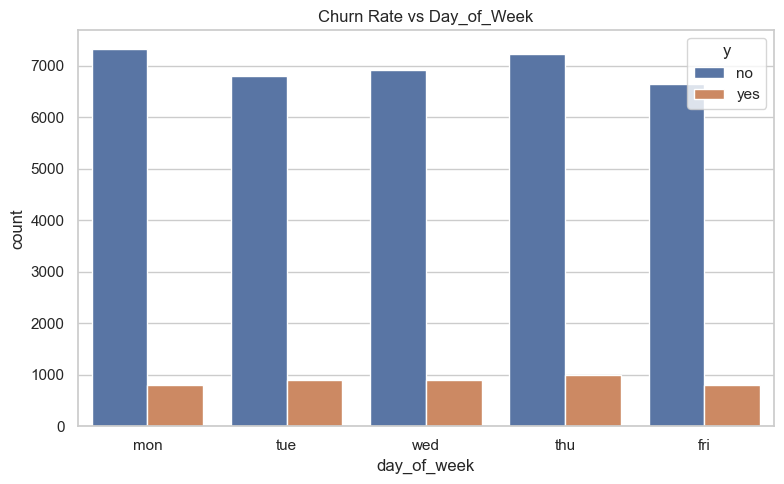

In [94]:
plt.figure(figsize=(8, 5))
sns.countplot(x='day_of_week', hue='y', data=df)
plt.title("Churn Rate vs Day_of_Week")
plt.tight_layout()
plt.show()

In [95]:
print(df.groupby('previous')['y'].value_counts().unstack())

y              no     yes
previous                 
0         30926.0  2987.0
1          3458.0   898.0
2           374.0   318.0
3            82.0   120.0
4            29.0    32.0
5             5.0    11.0
6             2.0     2.0
7             1.0     NaN


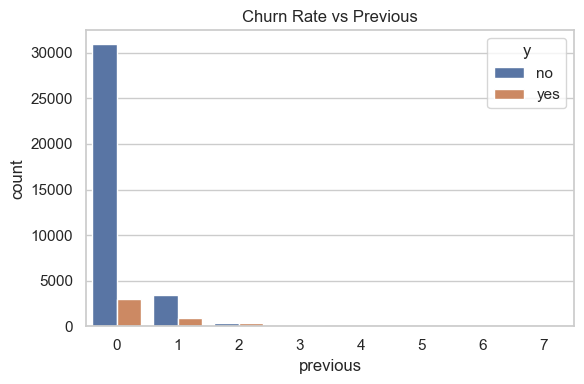

In [96]:
plt.figure(figsize=(6, 4))
sns.countplot(x='previous', hue='y', data=df)
plt.title("Churn Rate vs Previous")
plt.tight_layout()
plt.show()

In [97]:
print(df.groupby('poutcome')['y'].value_counts().unstack())

y               no   yes
poutcome                
failure       3502   555
nonexistent  30926  2987
success        449   826


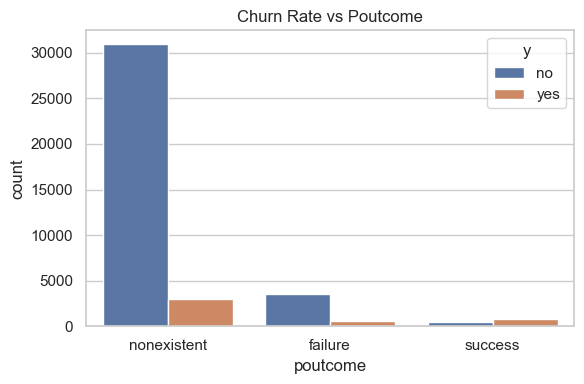

In [98]:
plt.figure(figsize=(6, 4))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title("Churn Rate vs Poutcome")
plt.tight_layout()
plt.show()

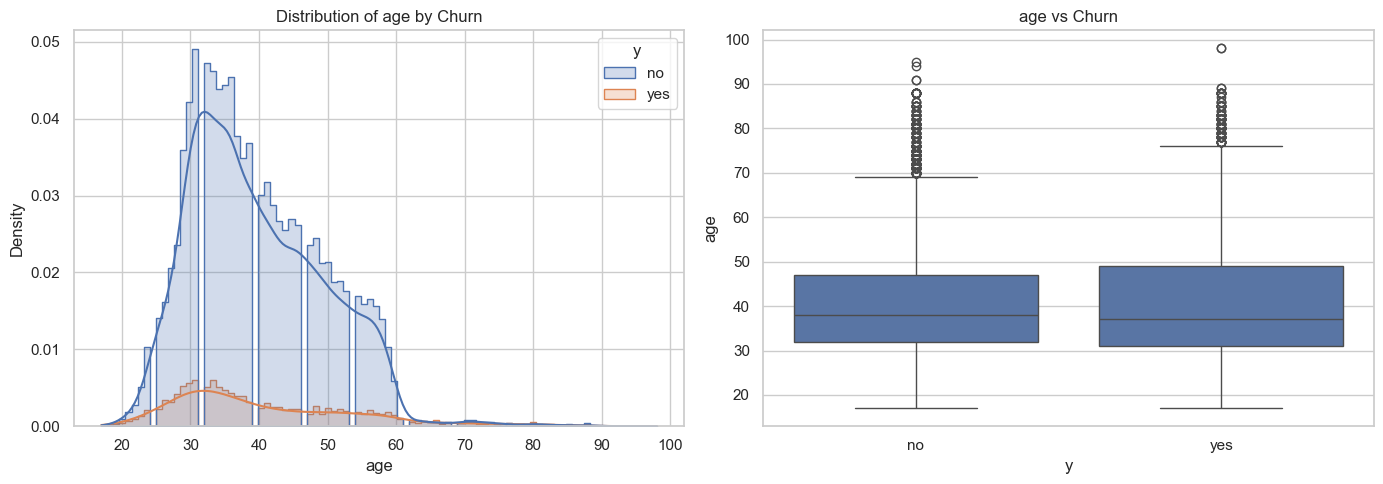

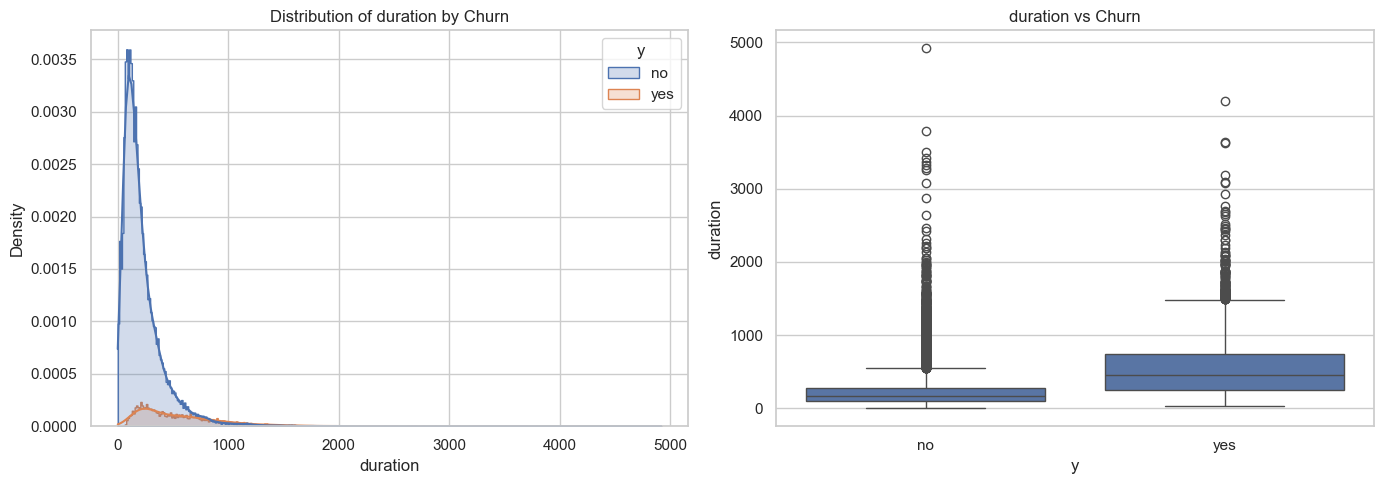

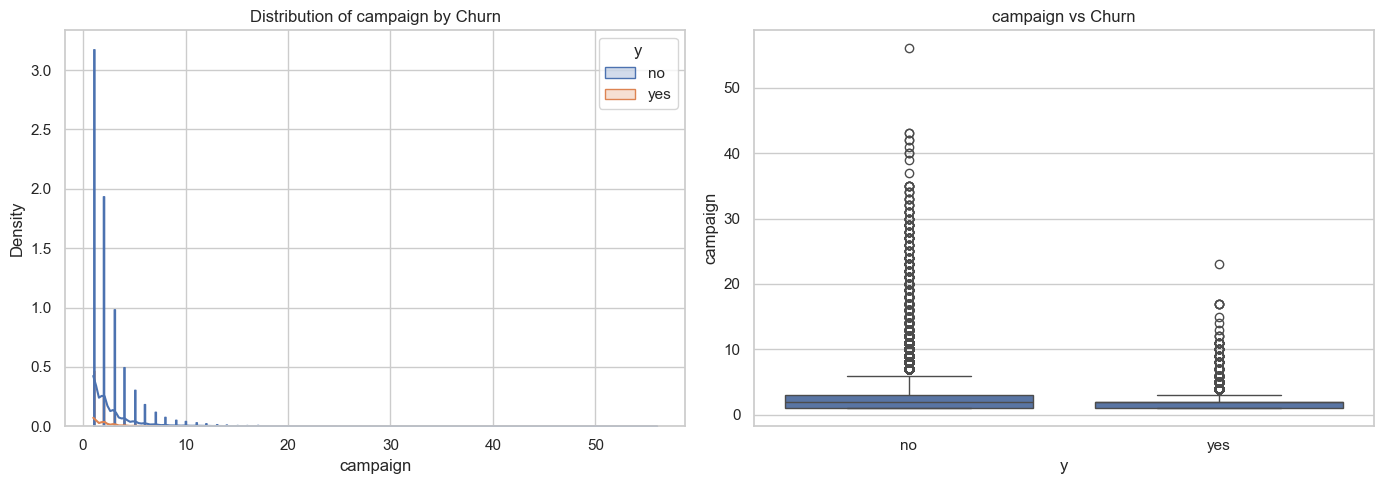

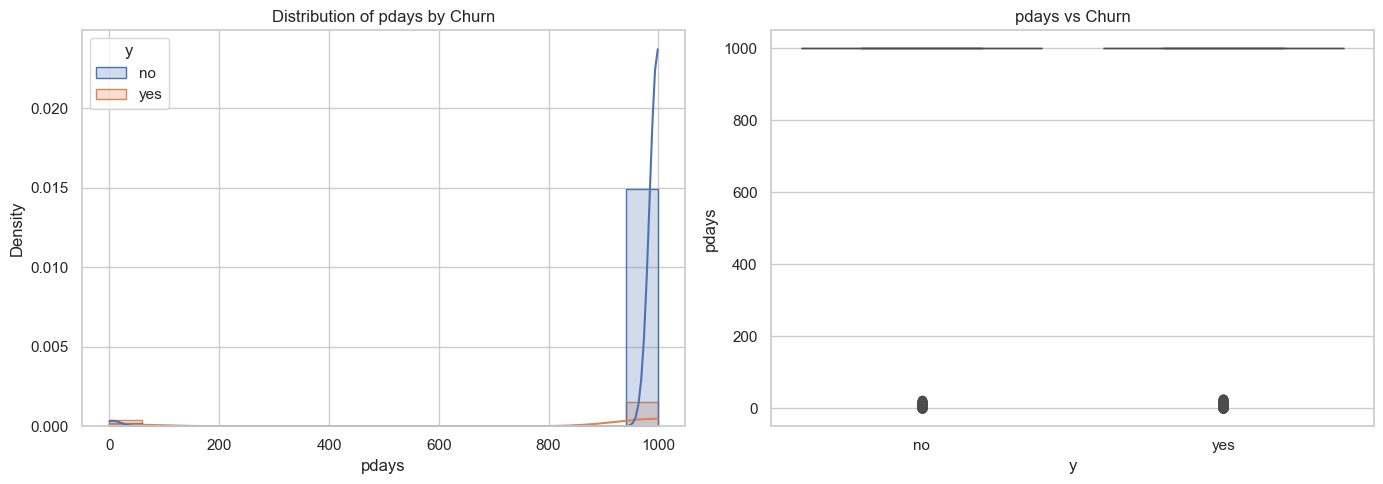

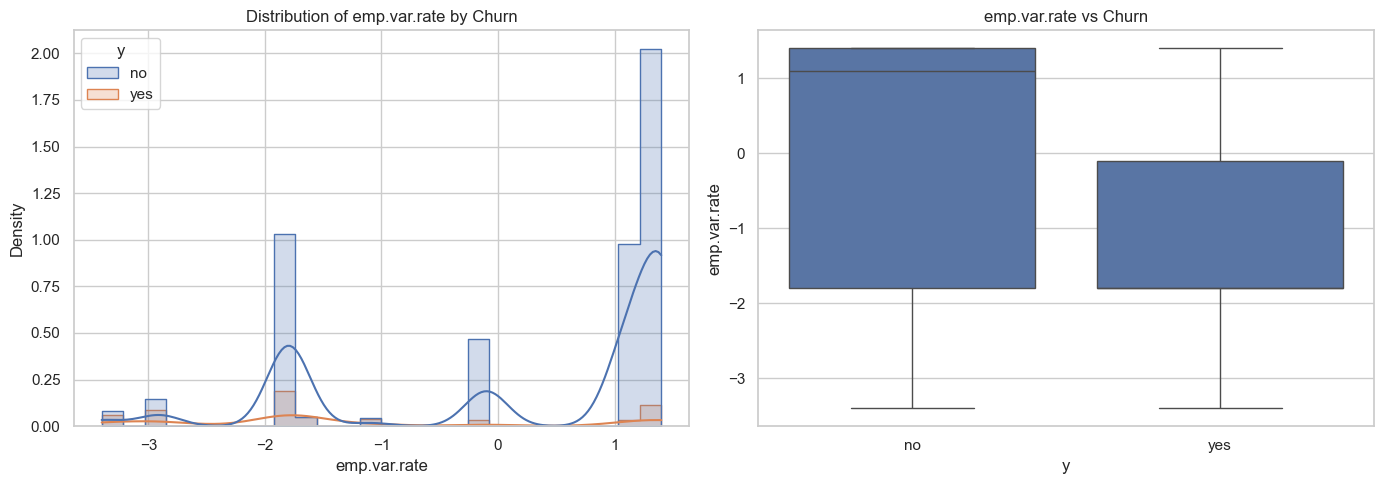

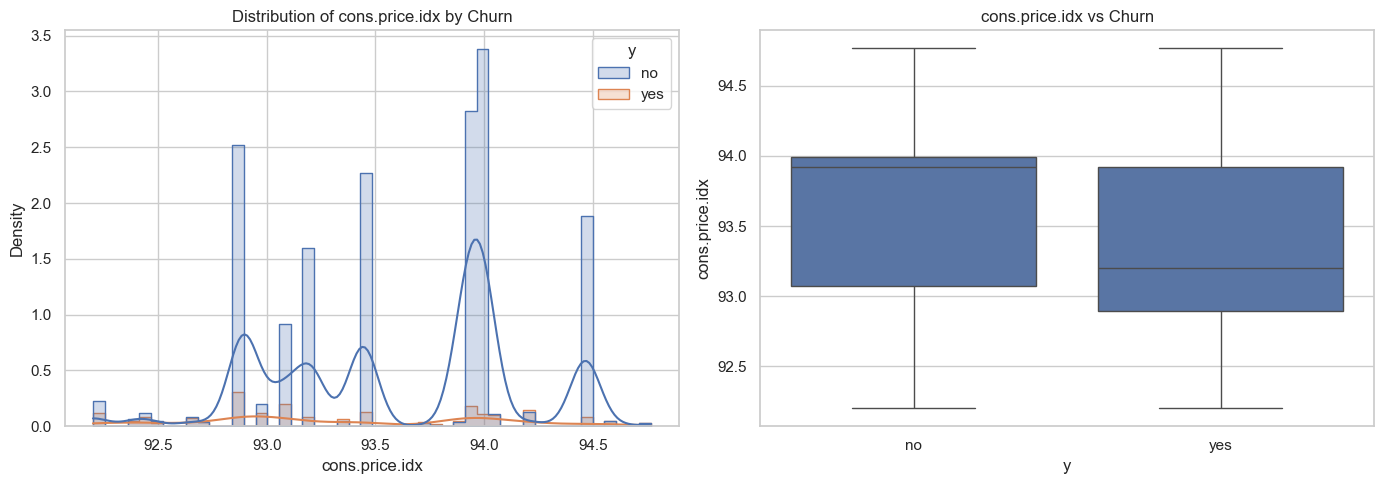

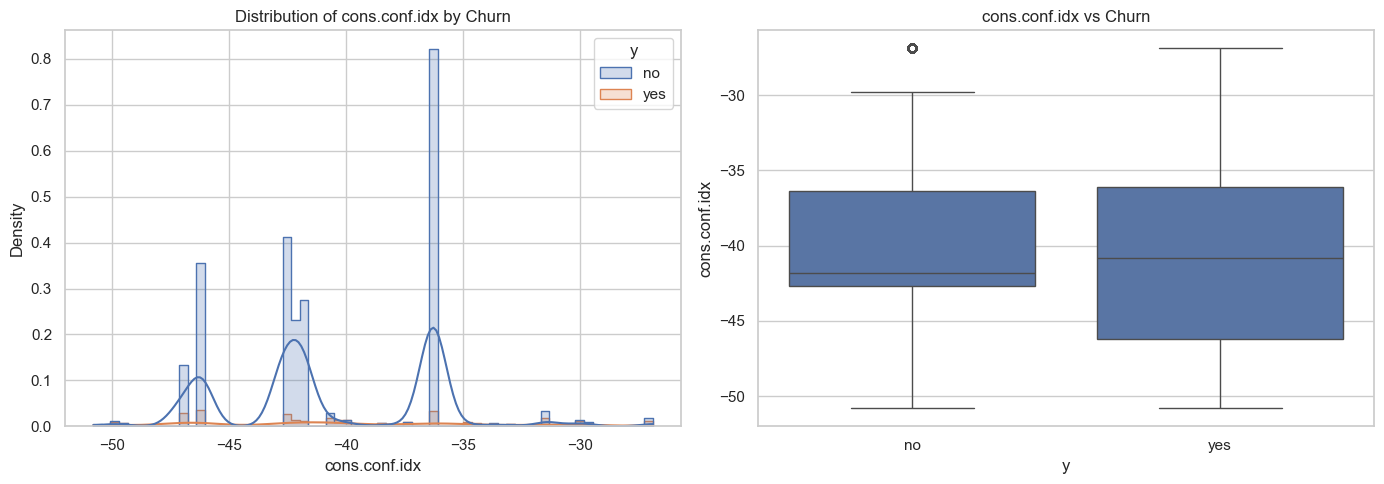

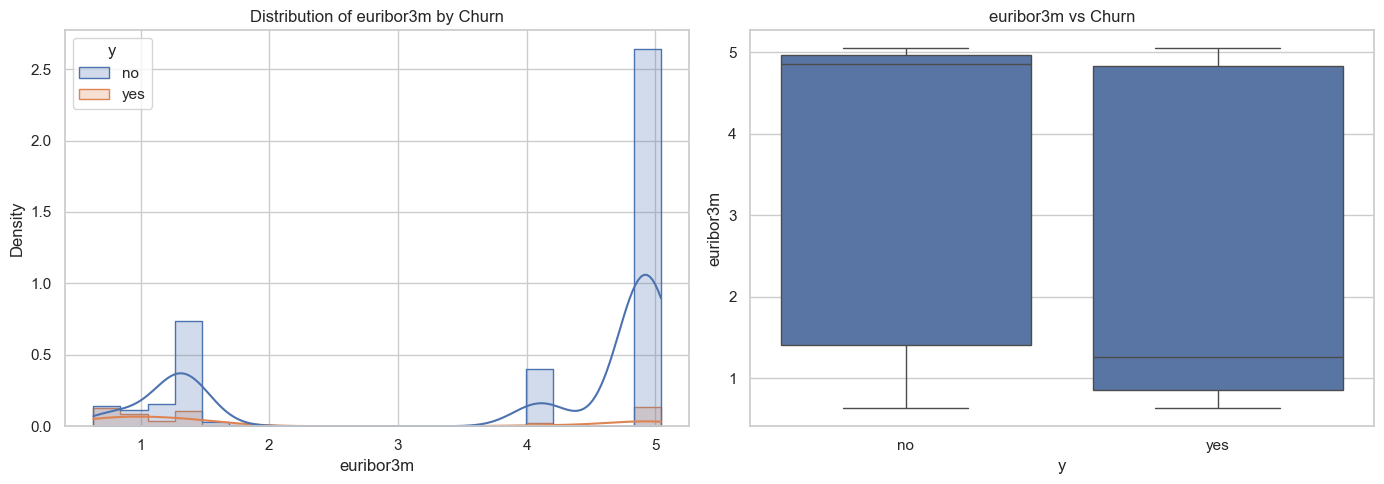

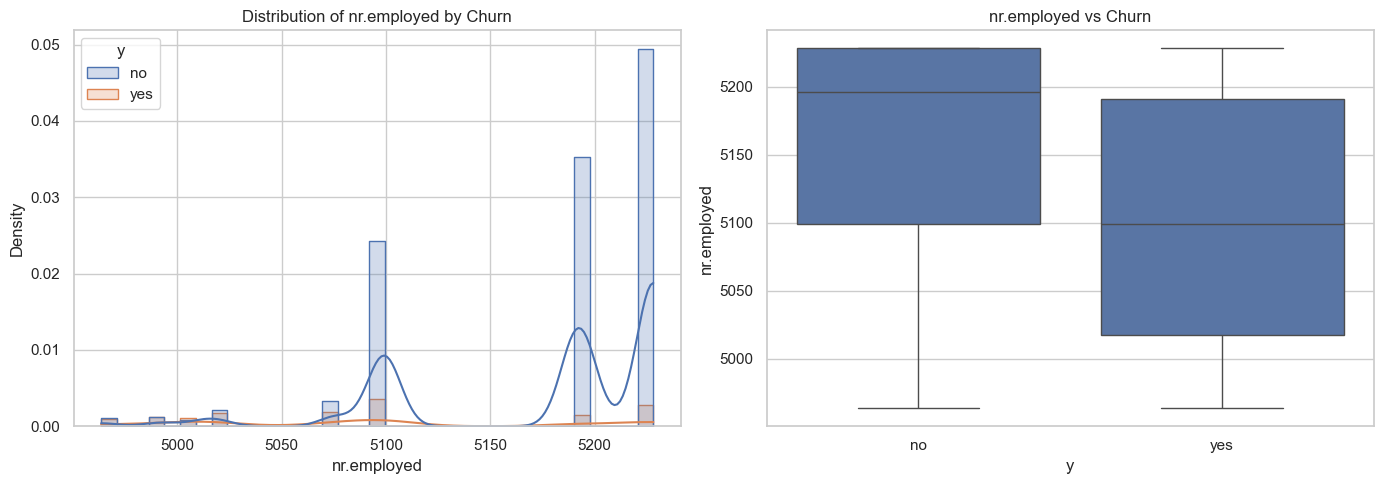

In [102]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 
                  'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numerical_cols:
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, hue='y', kde=True, element="step", stat="density")
    plt.title(f'Distribution of {col} by Churn')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='y', y=col)
    plt.title(f'{col} vs Churn')
    
    plt.tight_layout()
    plt.show()

In [103]:
df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})

In [104]:
numerical_corr_cols = ['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 
                       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_encoded']

corr_matrix = df[numerical_corr_cols].corr()

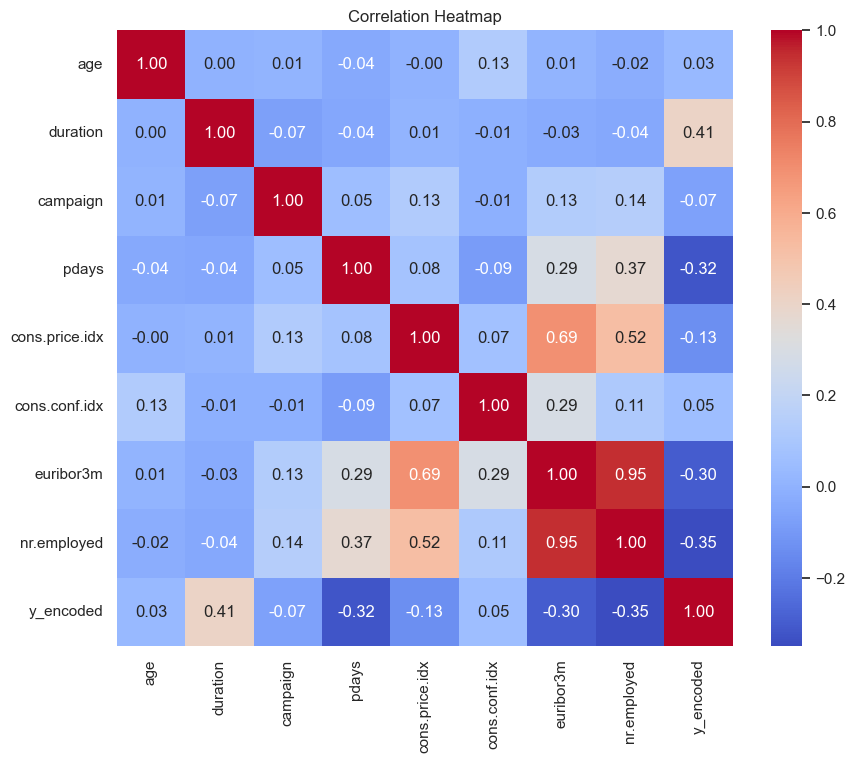

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [106]:
df_cleaned = df.copy()

In [107]:
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

num_cols = ['age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in num_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

In [108]:
df_model = df.copy()

In [109]:
df.to_csv("cleaned_bank_dataset.csv", index=False)